## Primer: zimske olimpijske igre, Soči 2014

Na primeru podatkov o olimpijskih igrah bomo preizkusili nekatere pogoste načine grafičnega prikaza podatkov.

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('../PR.mplstyle')

In [2]:
import pandas as pd
data = pd.read_table('../data/athletes.tab', skiprows=[1])

### Prikaz točk v prostoru

Poglejmo, ali sta višina in teža športnikov povezani. Za vsakega športnika narišimo točko v prostoru dveh spremelnjivk - razsevni diagram (ang. *scatter plot*).

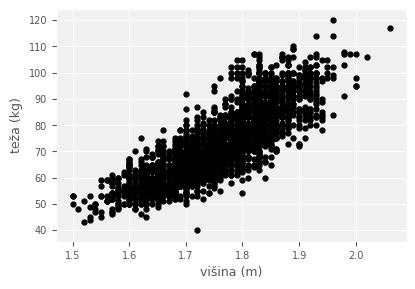

In [11]:
plt.figure()
x = data['height']
y = data['weight']
plt.plot(x, y, "k.")
plt.xlabel('višina (m)')
plt.ylabel('teža (kg)');

##### Vprašanje 2-2-3

Videti je, da sta spremenljivki povezani. Ali sta višina in teža res povezani? Odgovor na to vprašanje lahko dobimo z merami korelacije. S pomočjo slednjih izmerimo, ali sta dve naključni spremenljivki povezani.

<a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient">Pearsonova korelacija</a> med spremenljivkama $X$ in $Y$ je definirana z naslednjim izrazom:

$$\rho = \frac{(x - \bar{x})(y - \bar{y})}{\sigma_x \sigma_y}$$

kjer sta $x$ in $y$ vektorja vzorcev naključnih spremenljivk $X$ in $Y$, $\bar{x}$ in $\bar{y}$ povprečni vrednosti, $\sigma_x$, $\sigma_y$ standardna odklona. Mera $\rho$ zavzame vrednosti v intervalu [-1, 1], kjer vrednost -1 pomeni, da med spremenljivki velja negativna korelacija - sta obratno sorazmerni, vrednost 1 pa da sta premo sorazmerni. Vrednost 0 nakazuje, da sta spremenljivki neodvisni.

In [12]:
# implementiraj funkcijo, ki vrne Pearsonovo mero korelacije za vektorja x, y
def pearson(x, y):
    pass

In [13]:
# preveri ali sta višina in teža povezani
pearson(x, y)

[Odgovor](202-2.ipynb#Odgovor-2-2-3)

### Prikaz porazdelitev

Negotovost pri opazovanju naključne spremenljivke predstavimo s funkcijo porazdelitve. Pogost način, kako dobimo oceno za porazdelitev iz podatkov je uporaba histograma - preštejemo, koliko primerov spada v interval vrednosti spremenljivke. Poglejmo primer za telesno težo.

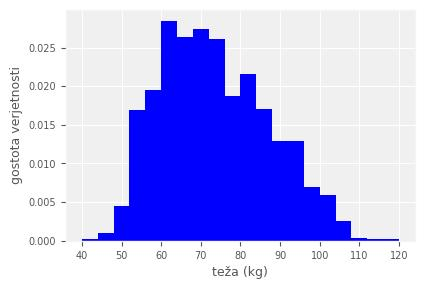

In [14]:
# porazdelitev tež
weights = data['weight']

plt.figure()
plt.hist(weights, density=True, bins=20, color='blue')
plt.xlabel('teža (kg)')
plt.ylabel('gostota verjetnosti');

##### Vprašanje 2-2-4

Ali so porazdelitev teže med posameznimi športi razlikuje? Kaj pa višine? Izberi športnike nekaterih športov in med njimi primerjaj porazdelitve.

In [15]:
# Primerjaj športe po porazdelitvi tež
# Primerjaj športe po porazdelitvi višin

[Odgovor](202-2.ipynb#Odgovor-2-2-4)

### Nagrade za dosego najvišjih mest

Še en način prikaza porazdelitev je tortni diagram. Prikažimo, kakšen kos pogače prinese vsaka od medalj (zlato \$25.000, srebro \$15.000, bron \$10.000).

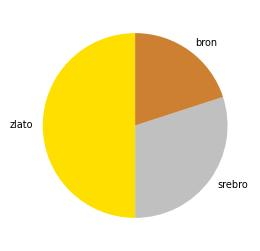

In [16]:
# prikaži primer slike in reprodukcija ; št medalj glede na državo
# Nariši tortni diagram za vsako državo posebej

# Denarni sklad; $25,000 za zlato, $15,000 za srebrno, $10,000 za bronasto medaljo 
total      = 25 + 15 + 10
gold_ratio = 25 / total
silv_ratio = 15 / total
bron_ratio = 10 / total

# barve medalj
gold_color = '#FFDF00'
silv_color = '#C0C0C0'
bron_color = '#CD7F32'

plt.figure(figsize=(3, 3))
plt.pie((gold_ratio, silv_ratio, bron_ratio),
        labels=('zlato', 'srebro', 'bron', ), 
        colors=(gold_color, silv_color, bron_color, ), 
        startangle=90);

Lažje berljiv stolpični diagram:

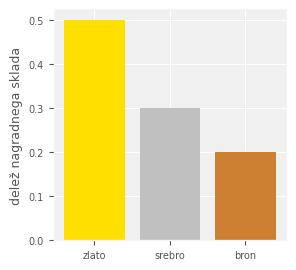

In [17]:
# lažje berljivi stolpični diagram
plt.figure(figsize=(3, 3))
plt.bar(range(3), height=(gold_ratio, silv_ratio, bron_ratio), 
        tick_label=('zlato', 'srebro', 'bron'), 
        color=(gold_color, silv_color, bron_color))
plt.ylabel('delež nagradnega sklada');

### Spol udeležencev

Prikažimo še bolj informativno porazdelitev, ki pokaže število moških in ženskih udeležencev iger za posamezno državo. Najprej izračunamo porazdelitev.

In [18]:
countries = pd.unique(data['country'])
gender_by_country = dict()

for country in countries:
    # Filter by countries
    data_subset = data.loc[data['country'] == country]

    # Filter males
    data_subset_male = data_subset.loc[data['gender'] == 'Male']
    # Filter females
    data_subset_female = data_subset.loc[data['gender'] == 'Female']

    # Store gender counts
    gender_by_country[country] = {
        'Male': len(data_subset_male),
        'Female': len(data_subset_female),
    }

Nato narišemo sliko z uporabo funkcijo `bar`:

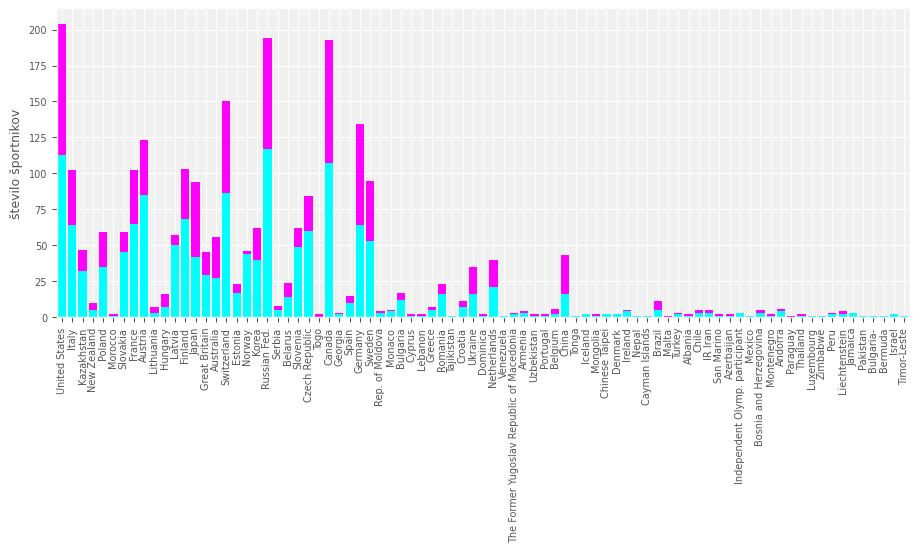

In [19]:
m = [gender_by_country[country]['Male'] for country in countries]
f = [gender_by_country[country]['Female'] for country in countries]
x = range(len(countries))

plt.figure(figsize=(11, 4))
plt.bar(x, m, color='cyan', align='center')
plt.bar(x, f, bottom=m, color='magenta', align='center')
plt.xlim(-0.5, len(countries)-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel('število športnikov');

##### Vprašanje 2-2-5

Grafu dodaj legendo.

[Odgovor](202-2.ipynb#Odgovor-2-2-5)

##### Vprašanje 2-2-6

Zgornji graf uredi tako, da bodo države urejene po številu udeležencev in dodaj legendo.

[Odgovor](202-2.ipynb#Odgovor-2-2-6)

### Najuspešnejše države

##### Vprašanje 2-2-7

Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev posameznih medalj po državah. Namig: najprej predpripravi podatke, nato pa nariši diagram. Zgleduj se po prejšnih primerih.

![](slike/odgovori/2-2-7.png)

In [20]:
# izračunaj distribucijo medalj

In [21]:
# izriši distribucijo

[Odgovor](202-2.ipynb#Odgovor-2-2-7)

### Sestavljene vizualizacije

Namen dobre vizualizacije je prava mera podatkov na danem prostoru. Ta naj ne bo prevelika, vseeno pa želimo čimbolje izkoristiti prostor. Oglejmo si primer risanja <b>porazdelitev podatkov o višini in teži glede na posamezno športno panogo</b>.  

In [22]:
# priprava podatkov
# teža in višina glede na sport; sport se nahaja v 8 stolpcu
sports = pd.unique(data['sport'])
weights_by_sport = dict()
heights_by_sport = dict()
ages_by_sport = dict()

for sport in sports:
    data_subset = data.loc[data['sport'] == sport]
    
    w = data_subset.loc[:,'weight'].values
    h = data_subset.loc[:,'height'].values
    a = data_subset.loc[:,'age'].values
    
    weights_by_sport[sport] = w
    heights_by_sport[sport] = h
    ages_by_sport[sport]    = a

##### Vprašanje 2-2-8

Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev višine po športih. Za vsakega igralca narišimo točko, kjer bo velikost točke premo sorazmerna s težo športnika. Osi x in y bomo izkoristili tako, da na osi x narišemo višino, na osi y pa bo posamezna športna panoga.

![](slike/odgovori/2-2-8.png)

In [23]:
# napiši kodo za izris slike

[Odgovor](202-2.ipynb#Odgovor-2-2-8)

##### Vprašanje 2-2-9

Uredi zgornji graf tako, da bodo športi urejeni po povprečni višini. Poizkusi tudi spreminjati količine na posameznih oseh (x, y, velikost pike).

[Odgovor](202-2.ipynb#Odgovor-2-2-9)